<a href="https://colab.research.google.com/github/oulbacha-ilyas/Machine-Learning-For-Stock-Market-Prediction/blob/main/experiment3dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Data Preprocessing

In [ ]:
####Selecting the best structure


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import Normalizer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import statistics
from datetime import datetime


dataset=pd.read_csv("fixations.csv")
fixationX=dataset[["start timestamp [ns]","end timestamp [ns]","duration [ms]","fixation x [px]"]]

facebook=pd.read_csv("Facebook.csv")
apple=pd.read_csv("Apple.csv")
amazon=pd.read_csv("Amazon.csv")
netflix=pd.read_csv("Netflix.csv")
google=pd.read_csv("Google.csv")


### replacing missing values
mean = facebook['Open'].mean()
facebook['Open'].fillna(mean, inplace=True)
mean = facebook['High'].mean()
facebook['High'].fillna(mean, inplace=True)
mean = facebook['Low'].mean()
facebook['Low'].fillna(mean, inplace=True)
mean = facebook['Close'].mean()
facebook['Close'].fillna(mean, inplace=True)
mean = facebook['Adj Close'].mean()
facebook['Adj Close'].fillna(mean, inplace=True)
mean = facebook['Volume'].mean()
facebook['Volume'].fillna(mean, inplace=True)

mean = apple['Open'].mean()
apple['Open'].fillna(mean, inplace=True)
mean = apple['High'].mean()
apple['High'].fillna(mean, inplace=True)
mean = apple['Low'].mean()
apple['Low'].fillna(mean, inplace=True)
mean = apple['Close'].mean()
apple['Close'].fillna(mean, inplace=True)
mean = apple['Adj Close'].mean()
apple['Adj Close'].fillna(mean, inplace=True)
mean = apple['Volume'].mean()
apple['Volume'].fillna(mean, inplace=True)

mean = amazon['Open'].mean()
amazon['Open'].fillna(mean, inplace=True)
mean = amazon['High'].mean()
amazon['High'].fillna(mean, inplace=True)
mean = amazon['Low'].mean()
amazon['Low'].fillna(mean, inplace=True)
mean = amazon['Close'].mean()
amazon['Close'].fillna(mean, inplace=True)
mean = amazon['Adj Close'].mean()
amazon['Adj Close'].fillna(mean, inplace=True)
mean = amazon['Volume'].mean()
amazon['Volume'].fillna(mean, inplace=True)

mean = netflix['Open'].mean()
netflix['Open'].fillna(mean, inplace=True)
mean = netflix['High'].mean()
netflix['High'].fillna(mean, inplace=True)
mean = netflix['Low'].mean()
netflix['Low'].fillna(mean, inplace=True)
mean = netflix['Close'].mean()
netflix['Close'].fillna(mean, inplace=True)
mean = netflix['Adj Close'].mean()
netflix['Adj Close'].fillna(mean, inplace=True)
mean = netflix['Volume'].mean()
netflix['Volume'].fillna(mean, inplace=True)

mean = google['Open'].mean()
google['Open'].fillna(mean, inplace=True)
mean = google['High'].mean()
google['High'].fillna(mean, inplace=True)
mean = google['Low'].mean()
google['Low'].fillna(mean, inplace=True)
mean = google['Close'].mean()
google['Close'].fillna(mean, inplace=True)
mean = google['Adj Close'].mean()
google['Adj Close'].fillna(mean, inplace=True)
mean = google['Volume'].mean()
google['Volume'].fillna(mean, inplace=True)


facebook['Date']=facebook['Date'].astype('string')
amazon['Date']=amazon['Date'].astype('string')
apple['Date']=apple['Date'].astype('string')
netflix['Date']=netflix['Date'].astype('string')
google['Date']=google['Date'].astype('string')



### changing date to timestamp
format = "%Y-%m-%d"
facebook['timestamp']=np.nan

for i in facebook.index:
  date_string = facebook.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  facebook.iloc[i,7]=timestamp

facebook['Date']=facebook['timestamp']
facebook=facebook.drop(['timestamp'],axis=1)
facebook= facebook.rename(columns = {"Date":"Timestamp"})
facebook.head()

#####
format = "%Y-%m-%d"
amazon['timestamp']=np.nan

for i in amazon.index:
  date_string = amazon.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  amazon.iloc[i,7]=timestamp

amazon['Date']=amazon['timestamp']
amazon=amazon.drop(['timestamp'],axis=1)
amazon= amazon.rename(columns = {"Date":"Timestamp"})
amazon.head()

format = "%Y-%m-%d"
apple['timestamp']=np.nan

for i in apple.index:
  date_string = apple.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  apple.iloc[i,7]=timestamp

apple['Date']=apple['timestamp']
apple=apple.drop(['timestamp'],axis=1)
apple= apple.rename(columns = {"Date":"Timestamp"})
apple.head()

format = "%Y-%m-%d"
netflix['timestamp']=np.nan

for i in netflix.index:
  date_string = netflix.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  netflix.iloc[i,7]=timestamp

netflix['Date']=netflix['timestamp']
netflix=netflix.drop(['timestamp'],axis=1)
netflix= netflix.rename(columns = {"Date":"Timestamp"})
netflix.head()

format = "%Y-%m-%d"
google['timestamp']=np.nan

for i in google.index:
  date_string = google.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  google.iloc[i,7]=timestamp

google['Date']=google['timestamp']
google=google.drop(['timestamp'],axis=1)
google= google.rename(columns = {"Date":"Timestamp"})
google.head()



fixationX.describe()
#####


,start timestamp [ns],end timestamp [ns],duration [ms],fixation x [px]
count,1.023000e+03,1.023000e+03,1023.000000,1023.000000
mean,1.649869e+18,1.649869e+18,475.372434,573.489254
std,1.749428e+11,1.749531e+11,576.859891,134.203456
min,1.649868e+18,1.649868e+18,63.000000,151.086000
25%,1.649868e+18,1.649868e+18,216.000000,485.183500
50%,1.649869e+18,1.649869e+18,324.000000,537.795000
75%,1.649869e+18,1.649869e+18,542.000000,670.053000
max,1.649869e+18,1.649869e+18,10239.000000,1026.711000


# 2) Machine Learning Models Comparison

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

   Size     RMSE LR Adjusted R2    RMSE ANN  Difference
0   0.1  135.456736   -0.027842   289.93564 -154.478904
1   0.2  120.534541   -0.009431  268.037878 -147.503337
2   0.3  135.700287     0.02997  163.298188  -27.597901
3   0.4  141.788051    0.016241  195.536159  -53.748108
4   0.5   132.20971   -0.002532  191.404818  -59.195108
5   0.6  139.760666    0.012164  190.211227  -50.450561
6   0.7  136.792814     0.01198  175.005166  -38.212352
7   0.8  136.176285     0.00161  158.913308  -22.737023
8   0.9  137.752055    0.005358  191.757126  -54.005071
9   1.0  143.753661    0.000533  175.391471  -31.637811


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


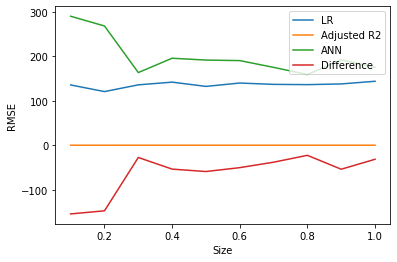

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import random
from random import sample
import seaborn as sns

sizes=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1]
fig, axes = plt.subplots(nrows=1, ncols=1)

results_fix=pd.DataFrame(columns=['Size','RMSE LR','Adjusted R2','RMSE ANN','Difference'])
results_fix['Size']=sizes
for i in range(10):

  #sampling
  fixationX_sample=fixationX.sample(n=round(1023*sizes[i]))
  y=fixationX_sample['fixation x [px]'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
 
  ######training the models
  ###Linear Regression
  X=fixationX_sample[["start timestamp [ns]","duration [ms]"]]
  y=fixationX_sample['fixation x [px]']
  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)

  sc= StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()
  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  #y_pred_train = model.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  r2_test = r2_score(y_test,y_pred_test)
  adj_r2_test=1 - (1-model_lr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

  
  results_fix.iloc[i,1]=rmse_test
  results_fix.iloc[i,2]=adj_r2_test

  #fig,axes= plt.subplots(nrows=2)
  #ax1=axes[0]
  #ax2=axes[1]

  #testing performance graph

  #ax1= plt.axes(projection ='3d')

  #a =X_test["start timestamp [ns]"]
  #b = X_test["end timestamp [ns]"]
  #c= y_test

  #ax1.scatter3D(a, b, c, 'blue')
  #ax1.scatter3D(a, b, y_pred_test,color='red' )
  #ax1.set_title('Model=LR,Predicted Fixation Vs Test Fixation Size ={}'.format(sizes[i]))
  #plt.show()

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)

  #print(classifier.predict(X_test))
  rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))

  results_fix.iloc[i,3]=rmse_test

  i+=1
results_fix['Difference']=results_fix['RMSE LR']-results_fix['RMSE ANN']
print(results_fix)
x = results_fix['Size']
#Y = results[['RMSE LR','Adjusted R2','RMSE ANN','Difference']]
plt.plot(x,results_fix['RMSE LR'],label="LR")
plt.plot(x,results_fix['Adjusted R2'],label="Adjusted R2")
plt.plot(x,results_fix['RMSE ANN'],label="ANN")
plt.plot(x,results_fix['Difference'],label="Difference")
plt.xlabel("Size")
plt.ylabel("RMSE")
plt.legend()


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


   Size          RMSE LR Adjusted R2         RMSE ANN      Difference
0   0.1  19694209.104922    0.283542  21909411.684074 -2215202.579152
1   0.2  31529148.780714    0.324592  30763461.959623   765686.821091
2   0.3  19763068.711595    0.170443  19106143.187156   656925.524439
3   0.4  22512463.562585    0.260527  22958547.206335   -446083.64375
4   0.5  22107747.730251    0.165563  23001213.062705  -893465.332454
5   0.6  25178502.133905    0.264827   26540085.62153 -1361583.487625
6   0.7  42224168.686904    0.265098  45215279.478697 -2991110.791793
7   0.8  21313826.361077    0.159342  22826621.654922 -1512795.293845
8   0.9  37605284.203274    0.247608  37368378.326708   236905.876566
9   1.0  39265999.022828    0.237687  39433677.375114  -167678.352286


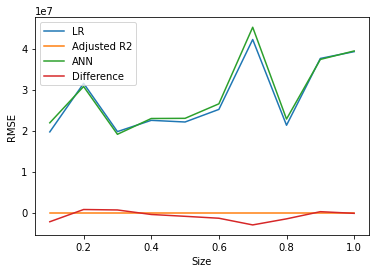

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import random
from random import sample
import seaborn as sns


dataset=facebook.iloc[:,[4,6]]
sizes=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1]
fig, axes = plt.subplots(nrows=1, ncols=1)

results_fb=pd.DataFrame(columns=['Size','RMSE LR','Adjusted R2','RMSE ANN','Difference'])
results_fb['Size']=sizes
for i in range(10):

  #sampling
  fixationX_sample=dataset.sample(n=round(1023*sizes[i]))
  y=fixationX_sample['Volume'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
 
  ######training the models
  ###Linear Regression
  X=fixationX_sample['Close']
  y=fixationX_sample['Volume']
  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)

  sc= StandardScaler()
  X_train=X_train.values.reshape(-1,1)
  X_test=X_test.values.reshape(-1,1)
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()
  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  #y_pred_train = model.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  r2_test = r2_score(y_test,y_pred_test)
  adj_r2_test=1 - (1-model_lr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

  
  results_fb.iloc[i,1]=rmse_test
  results_fb.iloc[i,2]=adj_r2_test

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)

  #print(classifier.predict(X_test))
  rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))

  results_fb.iloc[i,3]=rmse_test

  i+=1
results_fb['Difference']=results_fb['RMSE LR']-results_fb['RMSE ANN']
print(results_fb)
x = results_fb['Size']
#Y = results[['RMSE LR','Adjusted R2','RMSE ANN','Difference']]
plt.plot(x,results_fb['RMSE LR'],label="LR")
plt.plot(x,results_fb['Adjusted R2'],label="Adjusted R2")
plt.plot(x,results_fb['RMSE ANN'],label="ANN")
plt.plot(x,results_fb['Difference'],label="Difference")
plt.xlabel("Size")
plt.ylabel("RMSE")
plt.legend()


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

   Size          RMSE LR Adjusted R2         RMSE ANN     Difference
0   0.1   4088656.292527    0.091003   3901012.542146  187643.750382
1   0.2    6344916.04767    0.057673   6321378.313316   23537.734354
2   0.3   9580837.647192    0.064845   9307641.838765  273195.808427
3   0.4  10768180.996311     0.06381  10744607.783431    23573.21288
4   0.5   8203191.793319     0.06737   8244915.625412  -41723.832093
5   0.6    6235976.61903    0.052873    6145031.71829    90944.90074
6   0.7   6829366.369469    0.065412   6671854.640275  157511.729193
7   0.8   6469598.201494    0.054509   6271719.510619  197878.690875
8   0.9   8699550.475727    0.055902   8334840.253597  364710.222129
9   1.0   9085659.184396    0.063146   8886772.763497  198886.420899


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


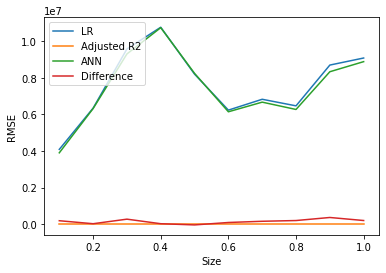

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import random
from random import sample
import seaborn as sns


dataset=amazon.iloc[:,[4,6]]
sizes=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1]
fig, axes = plt.subplots(nrows=1, ncols=1)

results_am=pd.DataFrame(columns=['Size','RMSE LR','Adjusted R2','RMSE ANN','Difference'])
results_am['Size']=sizes
for i in range(10):

  #sampling
  fixationX_sample=dataset.sample(n=round(1023*sizes[i]))
  y=fixationX_sample['Volume'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
 
  ######training the models
  ###Linear Regression
  X=fixationX_sample['Close']
  y=fixationX_sample['Volume']
  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)

  sc= StandardScaler()
  X_train=X_train.values.reshape(-1,1)
  X_test=X_test.values.reshape(-1,1)
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()
  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  #y_pred_train = model.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  r2_test = r2_score(y_test,y_pred_test)
  adj_r2_test=1 - (1-model_lr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

  
  results_am.iloc[i,1]=rmse_test
  results_am.iloc[i,2]=adj_r2_test

  #fig,axes= plt.subplots(nrows=2)
  #ax1=axes[0]
  #ax2=axes[1]

  #testing performance graph

  #ax1= plt.axes(projection ='3d')

  #a =X_test["start timestamp [ns]"]
  #b = X_test["end timestamp [ns]"]
  #c= y_test

  #ax1.scatter3D(a, b, c, 'blue')
  #ax1.scatter3D(a, b, y_pred_test,color='red' )
  #ax1.set_title('Model=LR,Predicted Fixation Vs Test Fixation Size ={}'.format(sizes[i]))
  #plt.show()

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)

  #print(classifier.predict(X_test))
  rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))

  results_am.iloc[i,3]=rmse_test

  i+=1
results_am['Difference']=results_am['RMSE LR']-results_am['RMSE ANN']
print(results_am)
x = results_am['Size']
#Y = results[['RMSE LR','Adjusted R2','RMSE ANN','Difference']]
plt.plot(x,results_am['RMSE LR'],label="LR")
plt.plot(x,results_am['Adjusted R2'],label="Adjusted R2")
plt.plot(x,results_am['RMSE ANN'],label="ANN")
plt.plot(x,results_am['Difference'],label="Difference")
plt.xlabel("Size")
plt.ylabel("RMSE")
plt.legend()


   Size           RMSE LR Adjusted R2          RMSE ANN       Difference
0   0.1   433928479.46164    0.003856  436249212.400922  -2320732.939281
1   0.2  535283608.272089    0.033587  533904754.569899   1378853.702191
2   0.3  363634707.095705     0.01682   369516401.82342  -5881694.727714
3   0.4  283437313.667968    0.012186  285563578.432754  -2126264.764786
4   0.5  305012998.965738    0.013305  308023337.584449  -3010338.618711
5   0.6  343659594.990928    0.041529  397419591.547299 -53759996.556372
6   0.7  316916800.268546    0.009934  313053280.590494   3863519.678052
7   0.8  265765131.963585    0.010688  269107992.651388  -3342860.687803
8   0.9  359051777.804365    0.022466  361812774.097413  -2760996.293048
9   1.0  348757322.213372    0.016598  353770149.621817  -5012827.408445


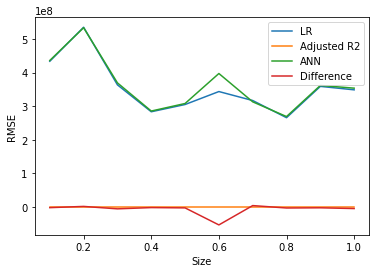

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import random
from random import sample
import seaborn as sns


dataset=apple.iloc[:,[4,6]]
sizes=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1]
fig, axes = plt.subplots(nrows=1, ncols=1)

results_ap=pd.DataFrame(columns=['Size','RMSE LR','Adjusted R2','RMSE ANN','Difference'])
results_ap['Size']=sizes
for i in range(10):

  #sampling
  fixationX_sample=dataset.sample(n=round(1023*sizes[i]))
  y=fixationX_sample['Volume'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
 
  ######training the models
  ###Linear Regression
  X=fixationX_sample['Close']
  y=fixationX_sample['Volume']
  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)

  sc= StandardScaler()
  X_train=X_train.values.reshape(-1,1)
  X_test=X_test.values.reshape(-1,1)
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()
  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  #y_pred_train = model.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  r2_test = r2_score(y_test,y_pred_test)
  adj_r2_test=1 - (1-model_lr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

  
  results_ap.iloc[i,1]=rmse_test
  results_ap.iloc[i,2]=adj_r2_test

  #fig,axes= plt.subplots(nrows=2)
  #ax1=axes[0]
  #ax2=axes[1]

  #testing performance graph

  #ax1= plt.axes(projection ='3d')

  #a =X_test["start timestamp [ns]"]
  #b = X_test["end timestamp [ns]"]
  #c= y_test

  #ax1.scatter3D(a, b, c, 'blue')
  #ax1.scatter3D(a, b, y_pred_test,color='red' )
  #ax1.set_title('Model=LR,Predicted Fixation Vs Test Fixation Size ={}'.format(sizes[i]))
  #plt.show()

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)

  #print(classifier.predict(X_test))
  rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))

  results_ap.iloc[i,3]=rmse_test

  i+=1
results_ap['Difference']=results_ap['RMSE LR']-results_ap['RMSE ANN']
print(results_ap)
x = results_ap['Size']
#Y = results[['RMSE LR','Adjusted R2','RMSE ANN','Difference']]
plt.plot(x,results_ap['RMSE LR'],label="LR")
plt.plot(x,results_ap['Adjusted R2'],label="Adjusted R2")
plt.plot(x,results_ap['RMSE ANN'],label="ANN")
plt.plot(x,results_ap['Difference'],label="Difference")
plt.xlabel("Size")
plt.ylabel("RMSE")
plt.legend()


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


   Size          RMSE LR Adjusted R2         RMSE ANN      Difference
0   0.1   33943233.60631    0.003765  34624731.561949  -681497.955639
1   0.2  25279702.301669    0.028693  24272233.623183  1007468.678486
2   0.3  12584342.790444    0.024978   13120941.63438  -536598.843936
3   0.4  18535663.107764    0.055207  18694252.272079  -158589.164315
4   0.5  14281463.335258    0.050414  14181255.030032   100208.305226
5   0.6  19745238.927215    0.056236  19854908.779951  -109669.852736
6   0.7  16067323.929937    0.034761   16194632.26395  -127308.334013
7   0.8  22539412.266341     0.04417  22666978.939024  -127566.672683
8   0.9  18293316.264557    0.035179  18776391.248722  -483074.984164
9   1.0  20486135.656784    0.033871  20860675.578072  -374539.921288


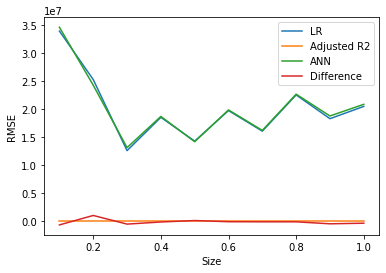

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import random
from random import sample
import seaborn as sns


dataset=netflix.iloc[:,[4,6]]
sizes=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1]
fig, axes = plt.subplots(nrows=1, ncols=1)

results_nt=pd.DataFrame(columns=['Size','RMSE LR','Adjusted R2','RMSE ANN','Difference'])
results_nt['Size']=sizes
for i in range(10):

  #sampling
  fixationX_sample=dataset.sample(n=round(1023*sizes[i]))
  y=fixationX_sample['Volume'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
 
  ######training the models
  ###Linear Regression
  X=fixationX_sample['Close']
  y=fixationX_sample['Volume']
  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)

  sc= StandardScaler()
  X_train=X_train.values.reshape(-1,1)
  X_test=X_test.values.reshape(-1,1)
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()
  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  #y_pred_train = model.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  r2_test = r2_score(y_test,y_pred_test)
  adj_r2_test=1 - (1-model_lr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

  
  results_nt.iloc[i,1]=rmse_test
  results_nt.iloc[i,2]=adj_r2_test

  #fig,axes= plt.subplots(nrows=2)
  #ax1=axes[0]
  #ax2=axes[1]

  #testing performance graph

  #ax1= plt.axes(projection ='3d')

  #a =X_test["start timestamp [ns]"]
  #b = X_test["end timestamp [ns]"]
  #c= y_test

  #ax1.scatter3D(a, b, c, 'blue')
  #ax1.scatter3D(a, b, y_pred_test,color='red' )
  #ax1.set_title('Model=LR,Predicted Fixation Vs Test Fixation Size ={}'.format(sizes[i]))
  #plt.show()

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)

  #print(classifier.predict(X_test))
  rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))

  results_nt.iloc[i,3]=rmse_test

  i+=1
results_nt['Difference']=results_nt['RMSE LR']-results_nt['RMSE ANN']
print(results_nt)
x = results_nt['Size']
#Y = results[['RMSE LR','Adjusted R2','RMSE ANN','Difference']]
plt.plot(x,results_nt['RMSE LR'],label="LR")
plt.plot(x,results_nt['Adjusted R2'],label="Adjusted R2")
plt.plot(x,results_nt['RMSE ANN'],label="ANN")
plt.plot(x,results_nt['Difference'],label="Difference")
plt.xlabel("Size")
plt.ylabel("RMSE")
plt.legend()


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

   Size         RMSE LR Adjusted R2        RMSE ANN      Difference
0   0.1   6048875.12204    0.142549   6146755.37727    -97880.25523
1   0.2   5424110.07125    0.406054  4662054.712089   762055.359161
2   0.3  5698645.578388    0.232493  4417572.157024  1281073.421364
3   0.4  6913208.015619    0.280003   5846170.50578   1067037.50984
4   0.5  5262735.518311    0.227848  4643989.133026   618746.385285
5   0.6  5078960.442663    0.287743  4222735.558159   856224.884503
6   0.7  6091408.612541    0.269613  5581961.419494   509447.193047
7   0.8  7476486.024722    0.283312  6471319.358693  1005166.666028
8   0.9  8321589.934372    0.337472  7537247.592095   784342.342277
9   1.0  7262963.711724    0.288827  8208702.243543   -945738.53182


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


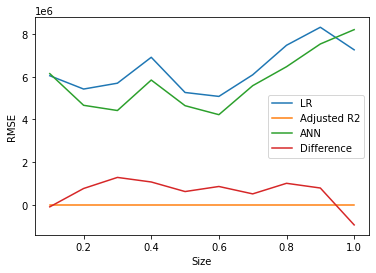

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import random
from random import sample
import seaborn as sns


dataset=google.iloc[:,[4,6]]
sizes=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1]
fig, axes = plt.subplots(nrows=1, ncols=1)

results_gg=pd.DataFrame(columns=['Size','RMSE LR','Adjusted R2','RMSE ANN','Difference'])
results_gg['Size']=sizes
for i in range(10):

  #sampling
  fixationX_sample=dataset.sample(n=round(1023*sizes[i]))
  y=fixationX_sample['Volume'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
 
  ######training the models
  ###Linear Regression
  X=fixationX_sample['Close']
  y=fixationX_sample['Volume']
  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)

  sc= StandardScaler()
  X_train=X_train.values.reshape(-1,1)
  X_test=X_test.values.reshape(-1,1)
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()
  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  #y_pred_train = model.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  r2_test = r2_score(y_test,y_pred_test)
  adj_r2_test=1 - (1-model_lr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

  
  results_gg.iloc[i,1]=rmse_test
  results_gg.iloc[i,2]=adj_r2_test

  #fig,axes= plt.subplots(nrows=2)
  #ax1=axes[0]
  #ax2=axes[1]

  #testing performance graph

  #ax1= plt.axes(projection ='3d')

  #a =X_test["start timestamp [ns]"]
  #b = X_test["end timestamp [ns]"]
  #c= y_test

  #ax1.scatter3D(a, b, c, 'blue')
  #ax1.scatter3D(a, b, y_pred_test,color='red' )
  #ax1.set_title('Model=LR,Predicted Fixation Vs Test Fixation Size ={}'.format(sizes[i]))
  #plt.show()

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)

  #print(classifier.predict(X_test))
  rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))

  results_gg.iloc[i,3]=rmse_test

  i+=1
results_gg['Difference']=results_gg['RMSE LR']-results_gg['RMSE ANN']
print(results_gg)
x = results_gg['Size']
#Y = results[['RMSE LR','Adjusted R2','RMSE ANN','Difference']]
plt.plot(x,results_gg['RMSE LR'],label="LR")
plt.plot(x,results_gg['Adjusted R2'],label="Adjusted R2")
plt.plot(x,results_gg['RMSE ANN'],label="ANN")
plt.plot(x,results_gg['Difference'],label="Difference")
plt.xlabel("Size")
plt.ylabel("RMSE")
plt.legend()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

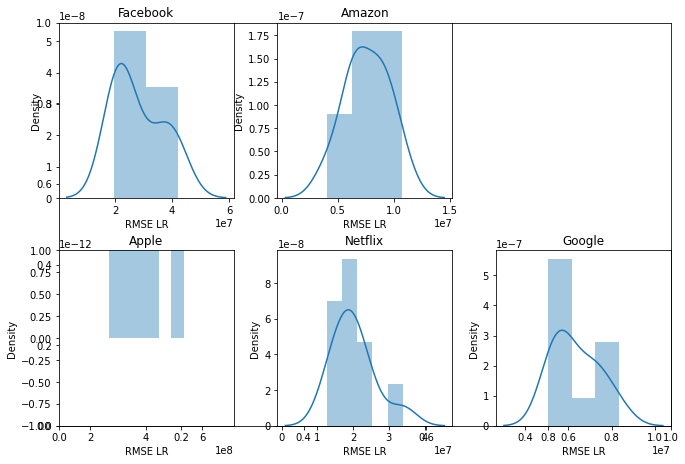

In [ ]:
from matplotlib.pylab import title
from scipy.stats import shapiro
from scipy.stats import kstest
import matplotlib.gridspec as gridspec

import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
import pylab as py

fig, axes = plt.subplots()
gs = gridspec.GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

sns.distplot(results_fb['RMSE LR'],ax=ax1).set(title="Facebook")
sns.distplot(results_am['RMSE LR'],ax=ax2).set(title="Amazon")
sns.distplot(results_ap['RMSE LR'],ax=ax3).set(title="Apple")
sns.distplot(results_nt['RMSE LR'],ax=ax4).set(title="Netflix")
sns.distplot(results_gg['RMSE LR'],ax=ax5).set(title="Google")
fig.set_figheight(7)
fig.set_figwidth(10)

plt.subplots_adjust(left=0.05,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.3)


In [ ]:
#perform Kolmogorov-Smirnov test


normality=pd.DataFrame(columns=['Dataset','S-W statistic','S-W p-value','K-S statistic','K-S p-value'])
normality['Dataset']=['Facebook','Apple','Amazon','Netflix','Google']



#s1,p1=shapiro(results_fix['RMSE LR'])
s2,p2=shapiro(results_fb['RMSE LR'])
s3,p3=shapiro(results_ap['RMSE LR'])
s4,p4=shapiro(results_am['RMSE LR'])
s5,p5=shapiro(results_nt['RMSE LR'])
s6,p6=shapiro(results_gg['RMSE LR'])


normality['S-W statistic']=[s2,s3,s4,s5,s6]
normality['S-W p-value']=[p2,p3,p4,p5,p6]

#fix=results_fix['RMSE LR'].values.tolist()
fb=results_fb['RMSE LR'].values.tolist()
ap=results_ap['RMSE LR'].values.tolist()
am=results_am['RMSE LR'].values.tolist()
nt=results_nt['RMSE LR'].values.tolist()
gg=results_gg['RMSE LR'].values.tolist()

#s1,p1=kstest(fix, 'norm')
s2,p2=kstest(fb, 'norm')
s3,p3=kstest(ap, 'norm')
s4,p4=kstest(am, 'norm')
s5,p5=kstest(nt, 'norm')
s6,p6=kstest(gg, 'norm')

normality['K-S statistic']=[s2,s3,s4,s5,s6]
normality['K-S p-value']=[p2,p3,p4,p5,p6]

print(normality)


    Dataset  S-W statistic  S-W p-value  K-S statistic  K-S p-value
0  Facebook       0.843833     0.049039            1.0          0.0
1     Apple       0.880362     0.131749            1.0          0.0
2    Amazon       0.967216     0.863905            1.0          0.0
3   Netflix       0.916916     0.331946            1.0          0.0
4    Google       0.931373     0.461531            1.0          0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

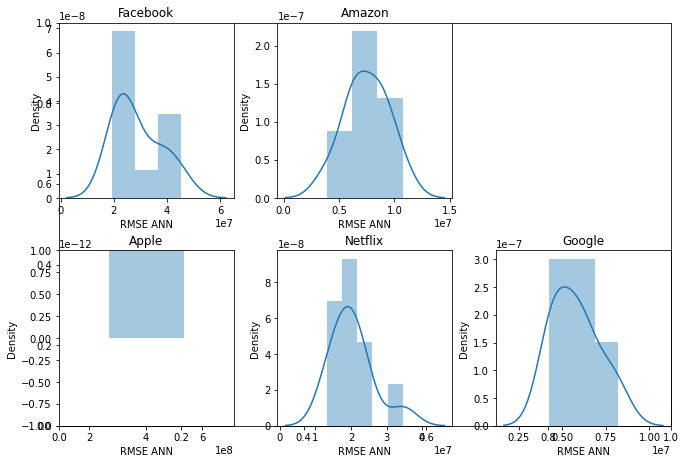

In [ ]:
from matplotlib.pylab import title
from scipy.stats import shapiro
from scipy.stats import kstest
import matplotlib.gridspec as gridspec

import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
import pylab as py

fig, axes = plt.subplots()
gs = gridspec.GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

sns.distplot(results_fb['RMSE ANN'],ax=ax1).set(title="Facebook")
sns.distplot(results_am['RMSE ANN'],ax=ax2).set(title="Amazon")
sns.distplot(results_ap['RMSE ANN'],ax=ax3).set(title="Apple")
sns.distplot(results_nt['RMSE ANN'],ax=ax4).set(title="Netflix")
sns.distplot(results_gg['RMSE ANN'],ax=ax5).set(title="Google")
fig.set_figheight(7)
fig.set_figwidth(10)

plt.subplots_adjust(left=0.05,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.3)


In [ ]:
#perform Kolmogorov-Smirnov test

#s1,p1=shapiro(results_fix['RMSE ANN'])
s2,p2=shapiro(results_fb['RMSE ANN'])
s3,p3=shapiro(results_ap['RMSE ANN'])
s4,p4=shapiro(results_am['RMSE ANN'])
s5,p5=shapiro(results_nt['RMSE ANN'])
s6,p6=shapiro(results_gg['RMSE ANN'])

normality=pd.DataFrame()
normality['Dataset']=['Facebook','Apple','Amazon','Netflix','Google']
normality['S-W statistic']=[s2,s3,s4,s5,s6]
normality['S-W p-value']=[p2,p3,p4,p5,p6]

#fix=results_fix['RMSE ANN'].values.tolist()
fb=results_fb['RMSE ANN'].values.tolist()
ap=results_ap['RMSE ANN'].values.tolist()
am=results_am['RMSE ANN'].values.tolist()
nt=results_nt['RMSE ANN'].values.tolist()
gg=results_gg['RMSE ANN'].values.tolist()

#s1,p1=kstest(fix, 'norm')
s2,p2=kstest(fb, 'norm')
s3,p3=kstest(ap, 'norm')
s4,p4=kstest(am, 'norm')
s5,p5=kstest(nt, 'norm')
s6,p6=kstest(gg, 'norm')

normality['K-S statistic']=[s2,s3,s4,s5,s6]
normality['K-S p-value']=[p2,p3,p4,p5,p6]

print(normality)


    Dataset  S-W statistic  S-W p-value  K-S statistic  K-S p-value
0  Facebook       0.877973     0.123672            1.0          0.0
1     Apple       0.923950     0.391078            1.0          0.0
2    Amazon       0.964262     0.833154            1.0          0.0
3   Netflix       0.891416     0.175910            1.0          0.0
4    Google       0.922745     0.380417            1.0          0.0


In [ ]:
lr=pd.DataFrame()
#lr['fix']=results_fix.iloc[:,1]
lr['fb']=results_fb.iloc[:,1]
lr['ap']=results_ap.iloc[:,1]
lr['am']=results_am.iloc[:,1]
lr['nt']=results_nt.iloc[:,1]
lr['gg']=results_gg.iloc[:,1]
ann=pd.DataFrame()
#ann['fix']=results_fix.iloc[:,3]
ann['fb']=results_fb.iloc[:,3]
ann['ap']=results_ap.iloc[:,3]
ann['am']=results_am.iloc[:,3]
ann['nt']=results_nt.iloc[:,3]
ann['gg']=results_gg.iloc[:,3]



wilcoxon_test=pd.DataFrame(columns=['Dataset','Wilcoxon statistic','p-value'])
dataset=['Facebook','Apple','Amazon','Netflix','Google']
for i in range(5):
  s1=lr.iloc[:,i].values.flatten()
  s2=ann.iloc[:,i].values.flatten()
  s,p=stats.wilcoxon(s1,s2)
  wilcoxon_test=wilcoxon_test.append({'Dataset':dataset[i],'Wilcoxon statistic':s,'p-value':p},ignore_index=True)
print(wilcoxon_test)


    Dataset  Wilcoxon statistic   p-value
0  Facebook                11.0  0.105469
1     Apple                 8.0  0.048828
2    Amazon                 3.0  0.009766
3   Netflix                11.0  0.105469
4    Google                 8.0  0.048828


In [ ]:
###multicomparison
friedman_test=pd.DataFrame(columns=['Model','Friedman statistic','p-value'])

statistic,pvalue=stats.friedmanchisquare(lr['fb'],lr['ap'],lr['am'],lr['nt'],lr['gg'])
friedman_test=friedman_test.append({'Model':'LR in all datasets','Friedman statistic':statistic,'p-value':pvalue},ignore_index=True)


statistic,pvalue=stats.friedmanchisquare(ann['fb'],ann['ap'],ann['am'],ann['nt'],ann['gg'])
friedman_test=friedman_test.append({'Model':'ANN in all datasets','Friedman statistic':statistic,'p-value':pvalue},ignore_index=True)


print(friedman_test)


                 Model  Friedman statistic       p-value
0   LR in all datasets               37.44  1.461888e-07
1  ANN in all datasets               38.00  1.120559e-07


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


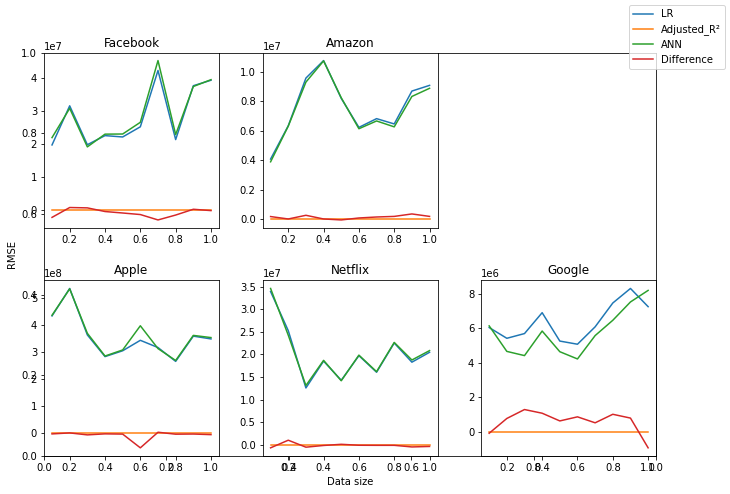

In [ ]:
from matplotlib.pylab import title
from scipy.stats import shapiro
from scipy.stats import kstest
import matplotlib.gridspec as gridspec

import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
import pylab as py

fig, axes = plt.subplots()
gs = gridspec.GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
axes.set_xlabel('Data size')
axes.set_ylabel('RMSE')

fig.set_figheight(7)
fig.set_figwidth(10)

plt.subplots_adjust(left=0.05,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.3)

ax1.plot(x,results_fb['RMSE LR'],label="LR")
ax1.plot(x,results_fb['Adjusted R2'],label="Adjusted R2")
ax1.plot(x,results_fb['RMSE ANN'],label="ANN")
ax1.plot(x,results_fb['Difference'],label="Difference")
ax1.title.set_text('Facebook')

ax2.plot(x,results_am['RMSE LR'],label="LR")
ax2.plot(x,results_am['Adjusted R2'],label="Adjusted R2")
ax2.plot(x,results_am['RMSE ANN'],label="ANN")
ax2.plot(x,results_am['Difference'],label="Difference")
ax2.title.set_text('Amazon')

ax3.plot(x,results_ap['RMSE LR'],label="LR")
ax3.plot(x,results_ap['Adjusted R2'],label="Adjusted R2")
ax3.plot(x,results_ap['RMSE ANN'],label="ANN")
ax3.plot(x,results_ap['Difference'],label="Difference")
ax3.title.set_text('Apple')

ax4.plot(x,results_nt['RMSE LR'],label="LR")
ax4.plot(x,results_nt['Adjusted R2'],label="Adjusted R2")
ax4.plot(x,results_nt['RMSE ANN'],label="ANN")
ax4.plot(x,results_nt['Difference'],label="Difference")
ax4.title.set_text('Netflix')

ax5.plot(x,results_gg['RMSE LR'],label="LR")
ax5.plot(x,results_gg['Adjusted R2'],label="Adjusted R2")
ax5.plot(x,results_gg['RMSE ANN'],label="ANN")
ax5.plot(x,results_gg['Difference'],label="Difference")
ax5.title.set_text('Google')
fig.legend([results_gg['RMSE LR'],results_nt['Adjusted R2'],results_nt['RMSE ANN'],results_nt['Difference']],labels=['LR','Adjusted_R²','ANN','Difference'],loc="best")